In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
np.random.seed(sum(map(ord, 'distributions')))

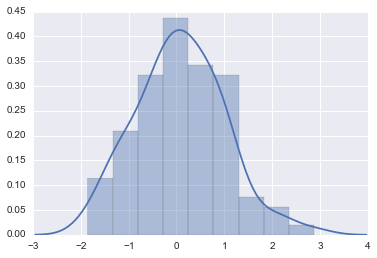

In [2]:
x = np.random.normal(size=100)
sns.distplot(x);

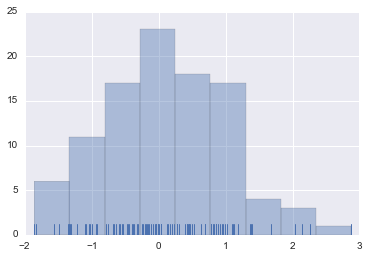

In [6]:
sns.distplot(x, kde=False, rug=True)

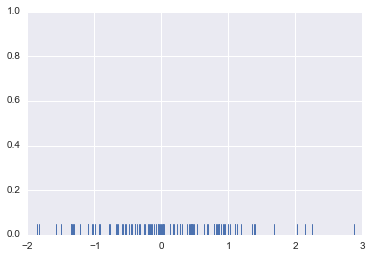

In [7]:
sns.rugplot(x)